In [1]:
import numpy as np
import cv2

from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})

In [2]:
boston = datasets.load_boston()

In [3]:
dir(boston)


['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
boston.data.shape


(506, 13)

In [5]:
boston.target.shape

(506,)

# Training the model

In [20]:
ridgereg = linear_model.Ridge()

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

In [30]:
ridgereg.fit(X_train, y_train)

Ridge()

In [31]:
metrics.mean_squared_error(y_train, ridgereg.predict(X_train))

21.824118291575854

In [32]:
ridgereg.score(X_train, y_train)

0.7487825119234439

# Testing

In [13]:
y_pred = ridgereg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

24.47719122770868

Text(0, 0.5, 'target value')

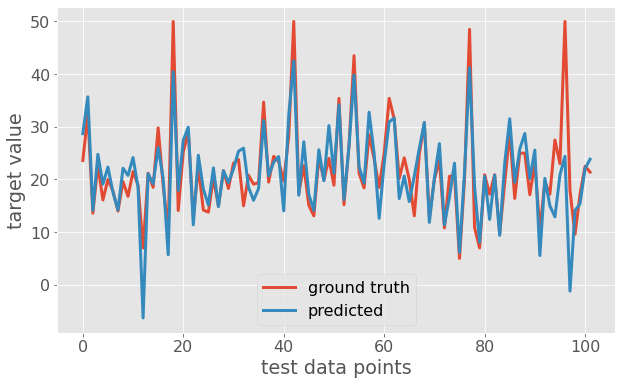

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(-5, 45, 'MSE = 24.477')

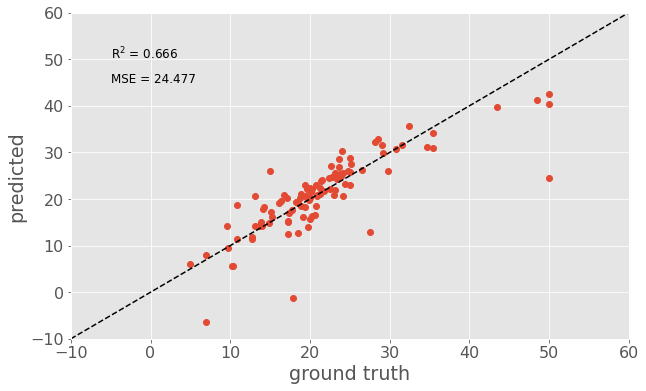

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')

scorestr = r'R$^2$ = %.3f' % ridgereg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)